In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("C:\\Users\\snehitha\\OneDrive\\Documents\\StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [6]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
#identifing unique values in dataset
print("Categories in 'gender' variable:",end=" ")
print(data['gender'].unique())

print("Categories in 'race/ethnicity' variable:",end=" ")
print(data['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:",end=" ")
print(data['parental level of education'].unique())

print("Categories in 'lunch' variable:",end=" ")
print(data['lunch'].unique())

print("Categories in 'test preparation course' variable:",end=" ")
print(data['test preparation course'].unique())       

Categories in 'gender' variable: ['female' 'male']
Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [9]:
#define numerical and categorical features

numeric_features=[feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features=[feature for feature in data.columns if data[feature].dtype == 'O']

#print

print('we have {} numeric features:{}'.format (len (numeric_features),numeric_features))
print('we have {} categorical features:{}'.format (len (categorical_features),categorical_features))

we have 3 numeric features:['math score', 'reading score', 'writing score']
we have 5 categorical features:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [10]:
df=pd.DataFrame(data)
df=df.assign(total_score= lambda x:x['math score']+x['reading score']+x['writing score'])
df




,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [11]:
df=df.assign(avg_score= lambda x:x['total_score']/3)
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
#we want students who are scored full and also attempted all the subjects
reading_full=df[df['reading score']==100]['avg_score'].count()
print(f'Number of students who got full marks in reading and attened all the subjects:{reading_full}')

writing_full=df[df['writing score']==100]['avg_score'].count()
print(f'Number of students who got full marks in writing  and attened all the subjects:{writing_full}')

math_full=df[df['math score']==100]['avg_score'].count()
print(f'Number of students who got full marks in math and attened all the subjects:{math_full}')

Number of students who got full marks in reading and attened all the subjects:17
Number of students who got full marks in writing  and attened all the subjects:14
Number of students who got full marks in math and attened all the subjects:7


In [13]:
#we want students who are scored at least 20 and also attempted all the subjects
reading_full=df[df['reading score']<=20]['avg_score'].count()
print(f'Number of students who got at least 30 in reading and attened all the subjects:{reading_full}')

writing_full=df[df['writing score']<=20]['avg_score'].count()
print(f'Number of students who got at least 20 in writing  and attened all the subjects:{writing_full}')

math_full=df[df['math score']<=20]['avg_score'].count()
print(f'Number of students who got at least 20 in math and attened all the subjects:{math_full}')

Number of students who got at least 30 in reading and attened all the subjects:1
Number of students who got at least 20 in writing  and attened all the subjects:3
Number of students who got at least 20 in math and attened all the subjects:4


In [14]:
import warnings 
#warning.filterwarning.('ignore')

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

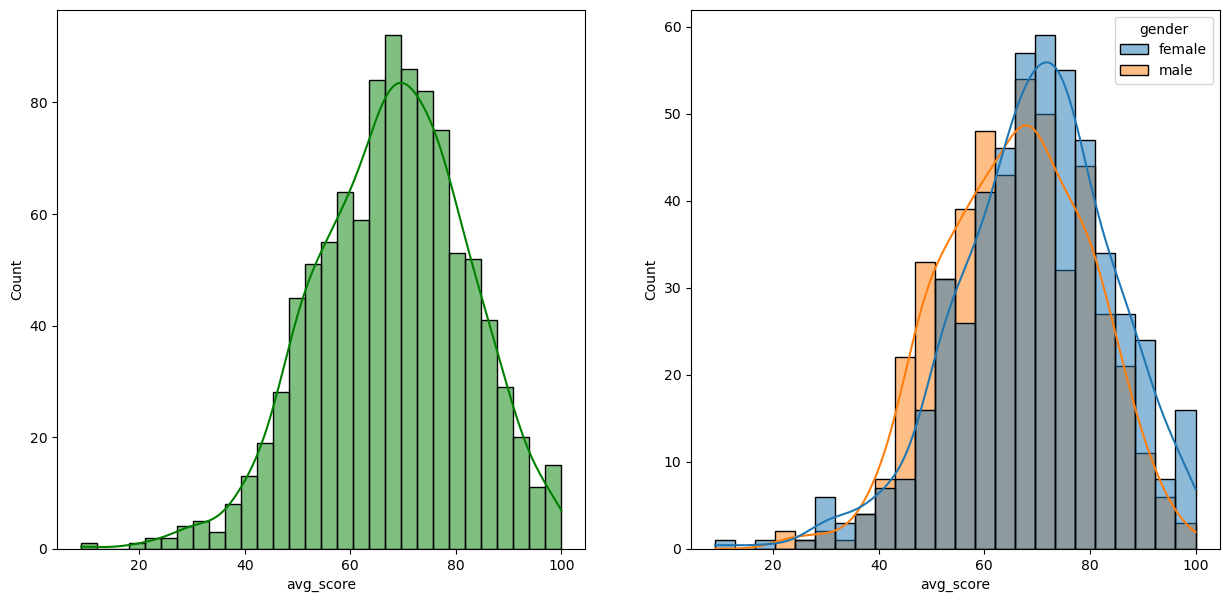

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
fig,axs=plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='avg_score',bins=30,kde=True,color='g',ax=axs[0])
sns.histplot(data=df,x='avg_score',kde=True,hue='gender',ax=axs[1])  #hue is used for based if we want plotting on one column
plt.show()

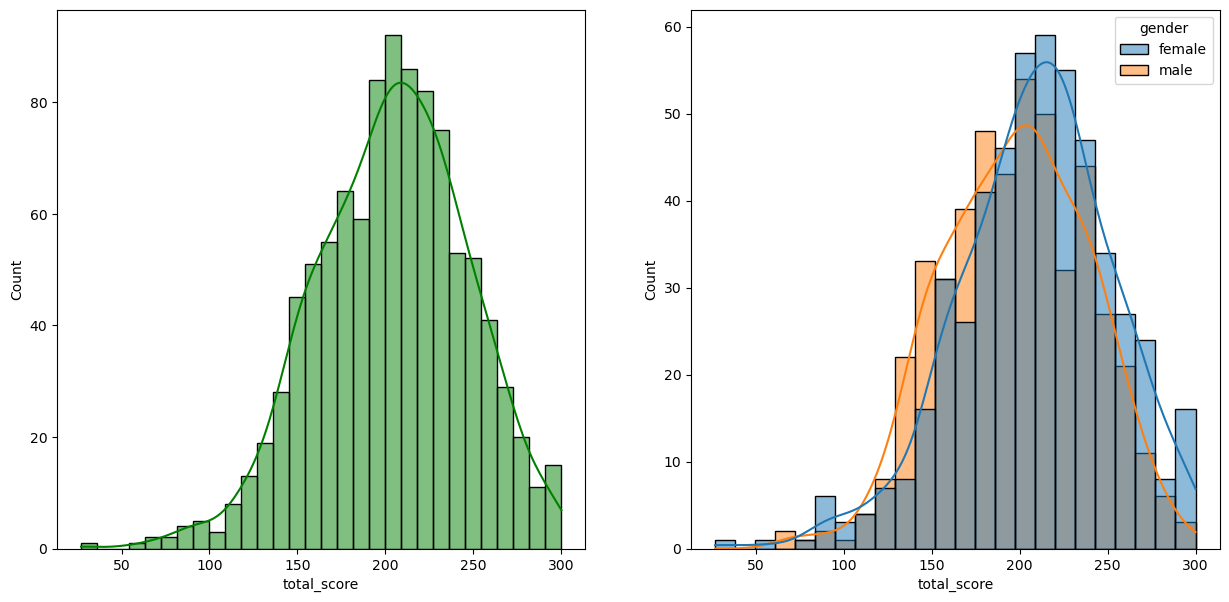

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
fig,axs=plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g',ax=axs[0])
sns.histplot(data=df,x='total_score',kde=True,hue='gender',ax=axs[1])  #hue is used for based if we want plotting on one column
plt.show()

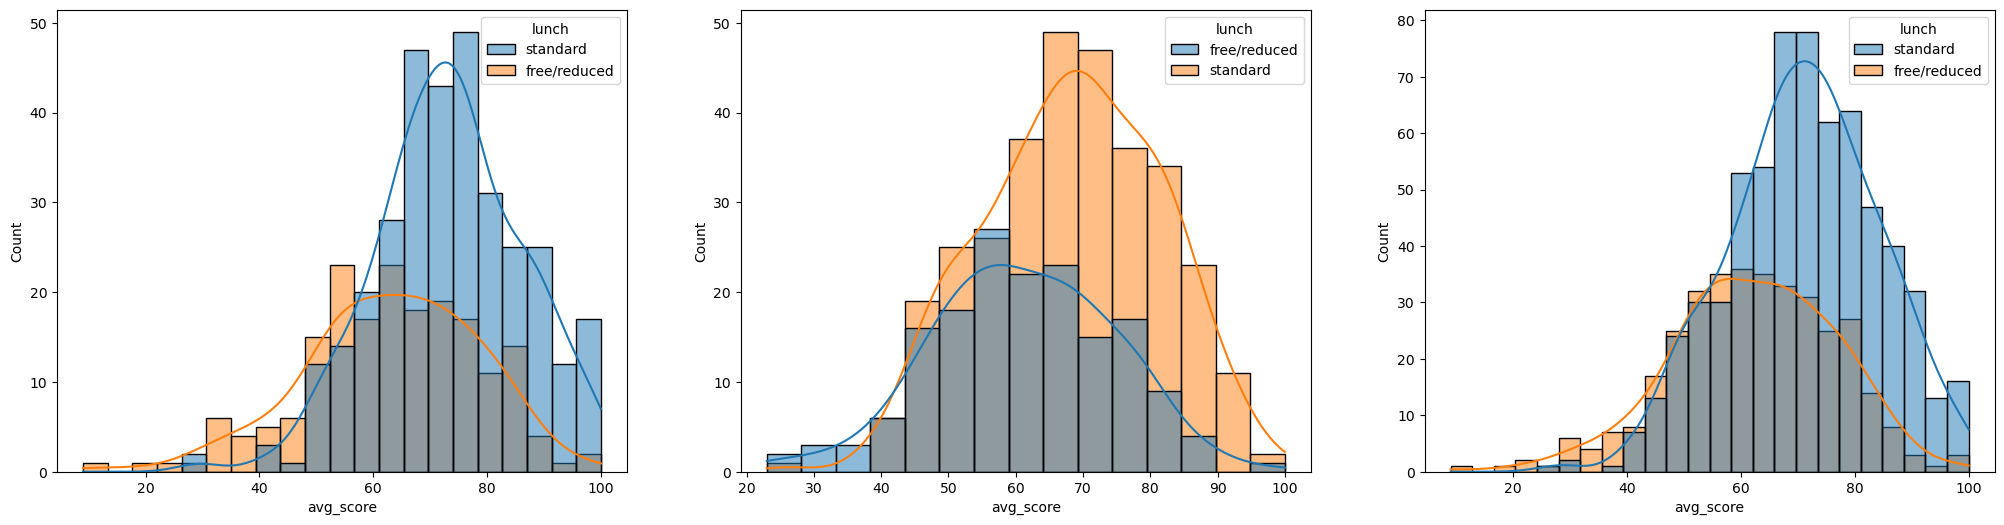

In [17]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
sns.histplot(data=df,x='avg_score',kde=True,hue='lunch')
sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='lunch',ax=axs[0])
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='lunch',ax=axs[1])
plt.show()

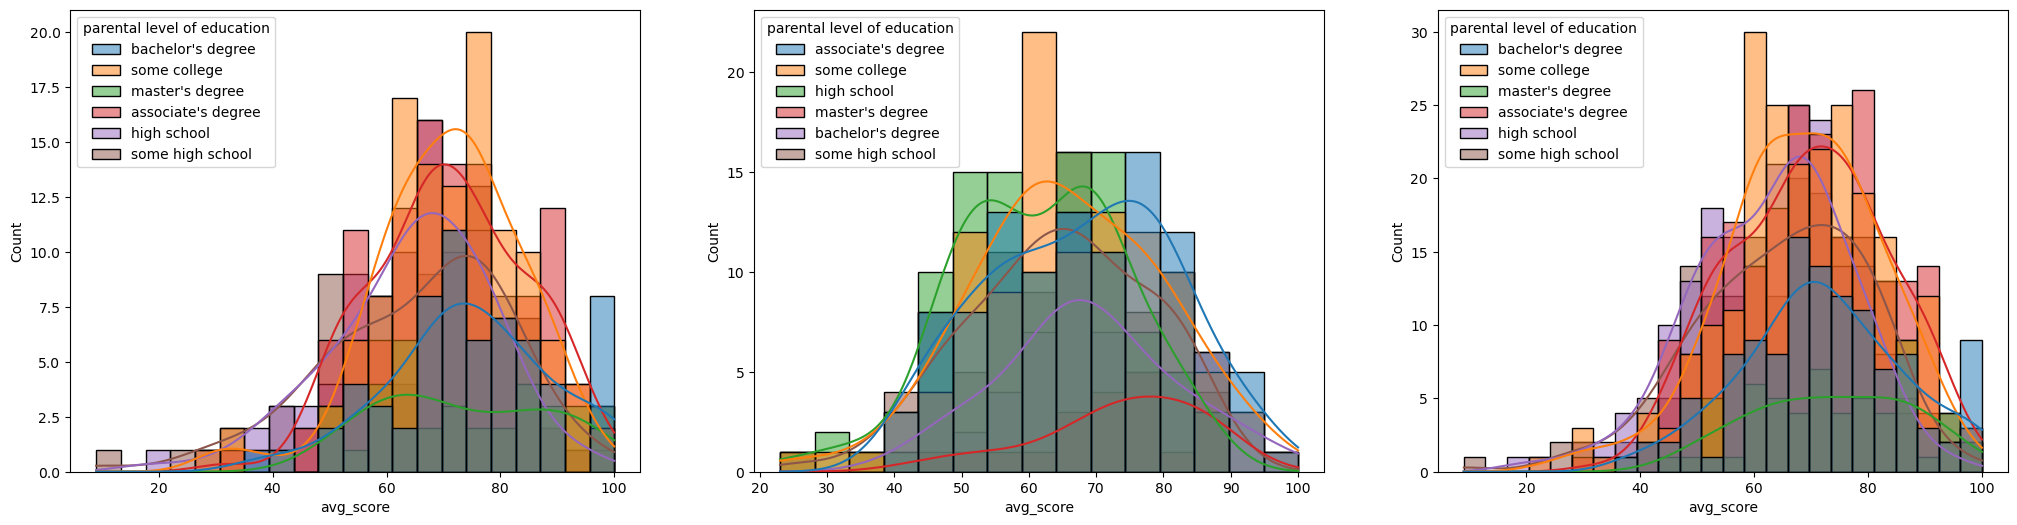

In [18]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
sns.histplot(data=df,x='avg_score',kde=True,hue='parental level of education')
sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='parental level of education',ax=axs[0])
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='parental level of education',ax=axs[1])
plt.show()

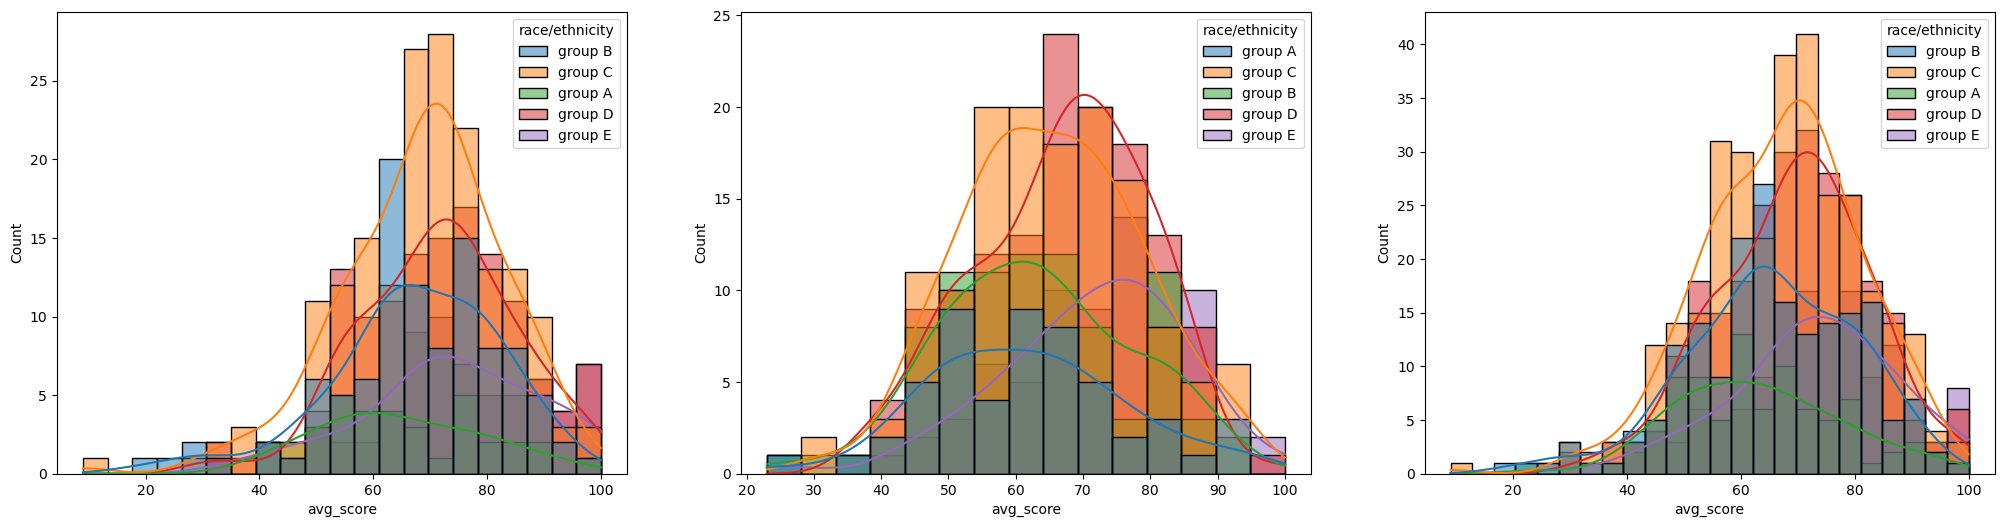

In [19]:
fig,axs=plt.subplots(1,3,figsize=(25,6))
sns.histplot(data=df,x='avg_score',kde=True,hue='race/ethnicity')
sns.histplot(data=df[df.gender=='female'],x='avg_score',kde=True,hue='race/ethnicity',ax=axs[0])
sns.histplot(data=df[df.gender=='male'],x='avg_score',kde=True,hue='race/ethnicity',ax=axs[1])
plt.show()

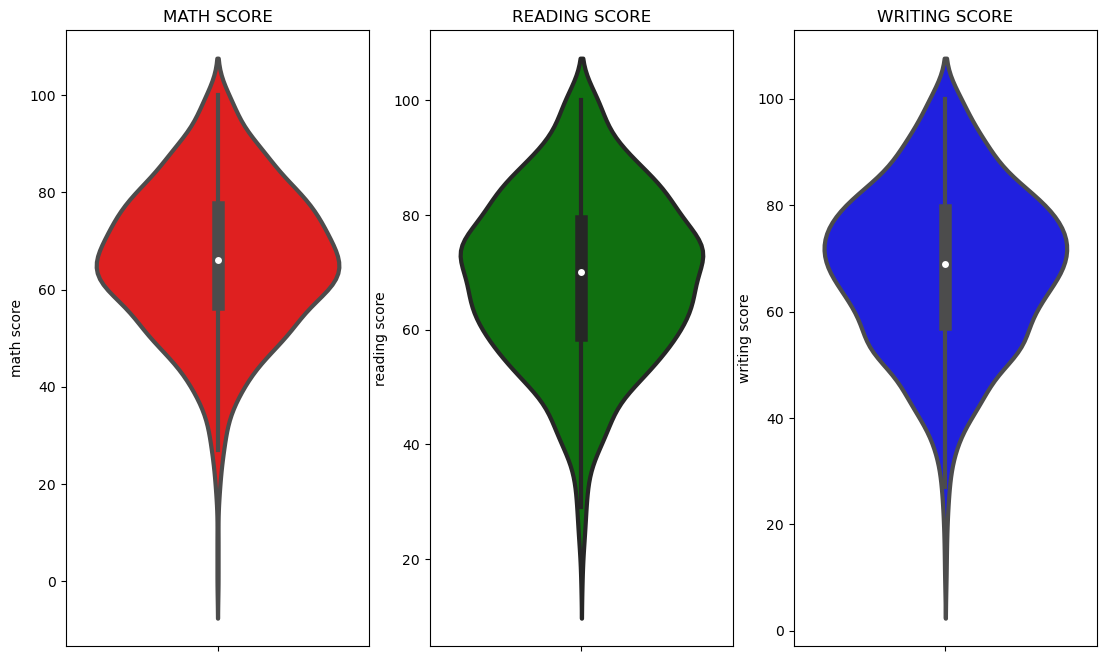

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORE')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

(-1.25, 1.25, -1.25, 1.25)

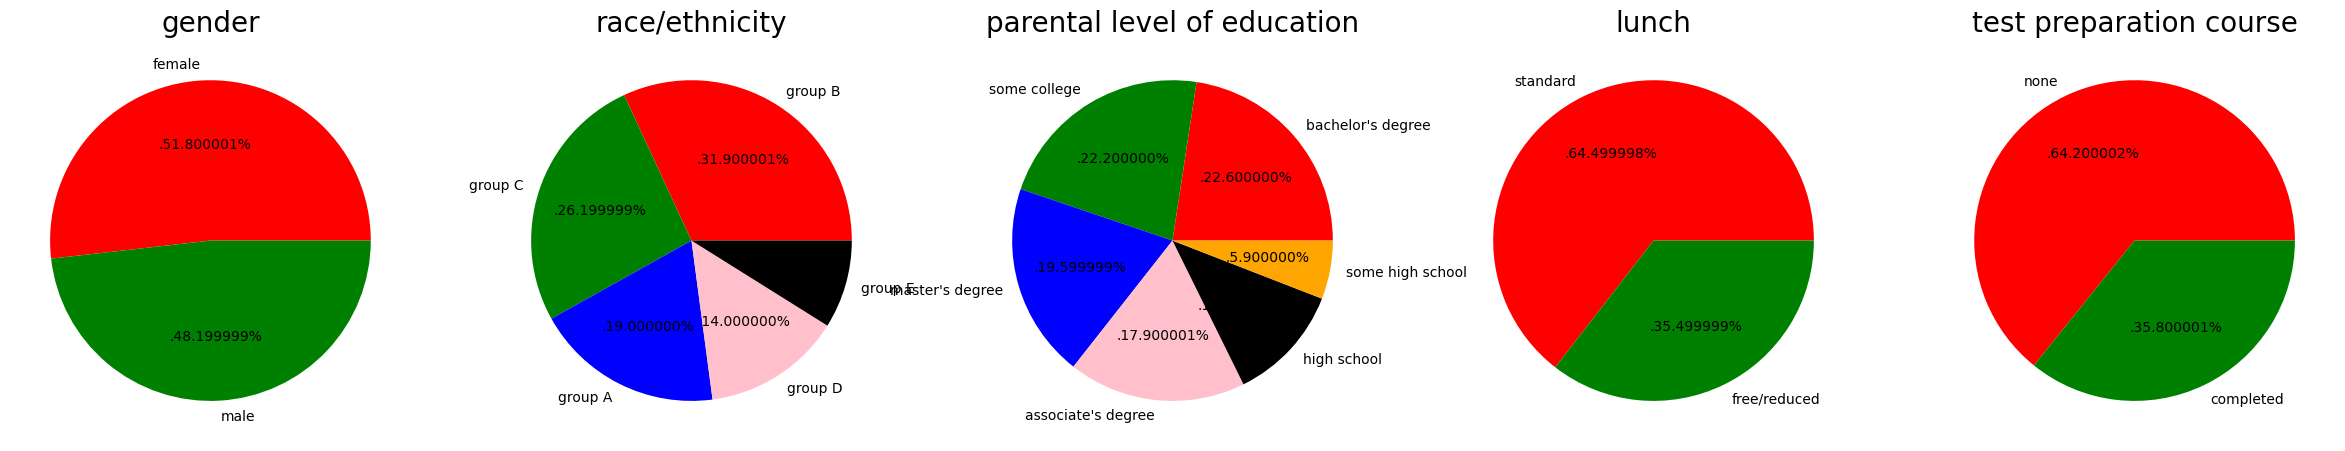

In [21]:
#multivarinat analysis
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='female','male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race/ethnicity'].value_counts()
labels=['group B', 'group C', 'group A', 'group D', 'group E']
color=['red','green','blue','pink','black']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('race/ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['parental level of education'].value_counts()
labels=["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school']
color=['red','green','blue','pink','black','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('parental level of education',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['lunch'].value_counts()
labels='standard', 'free/reduced'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['test preparation course'].value_counts()
labels='none', 'completed'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('test preparation course',fontsize=20)
plt.axis('off')

In [22]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

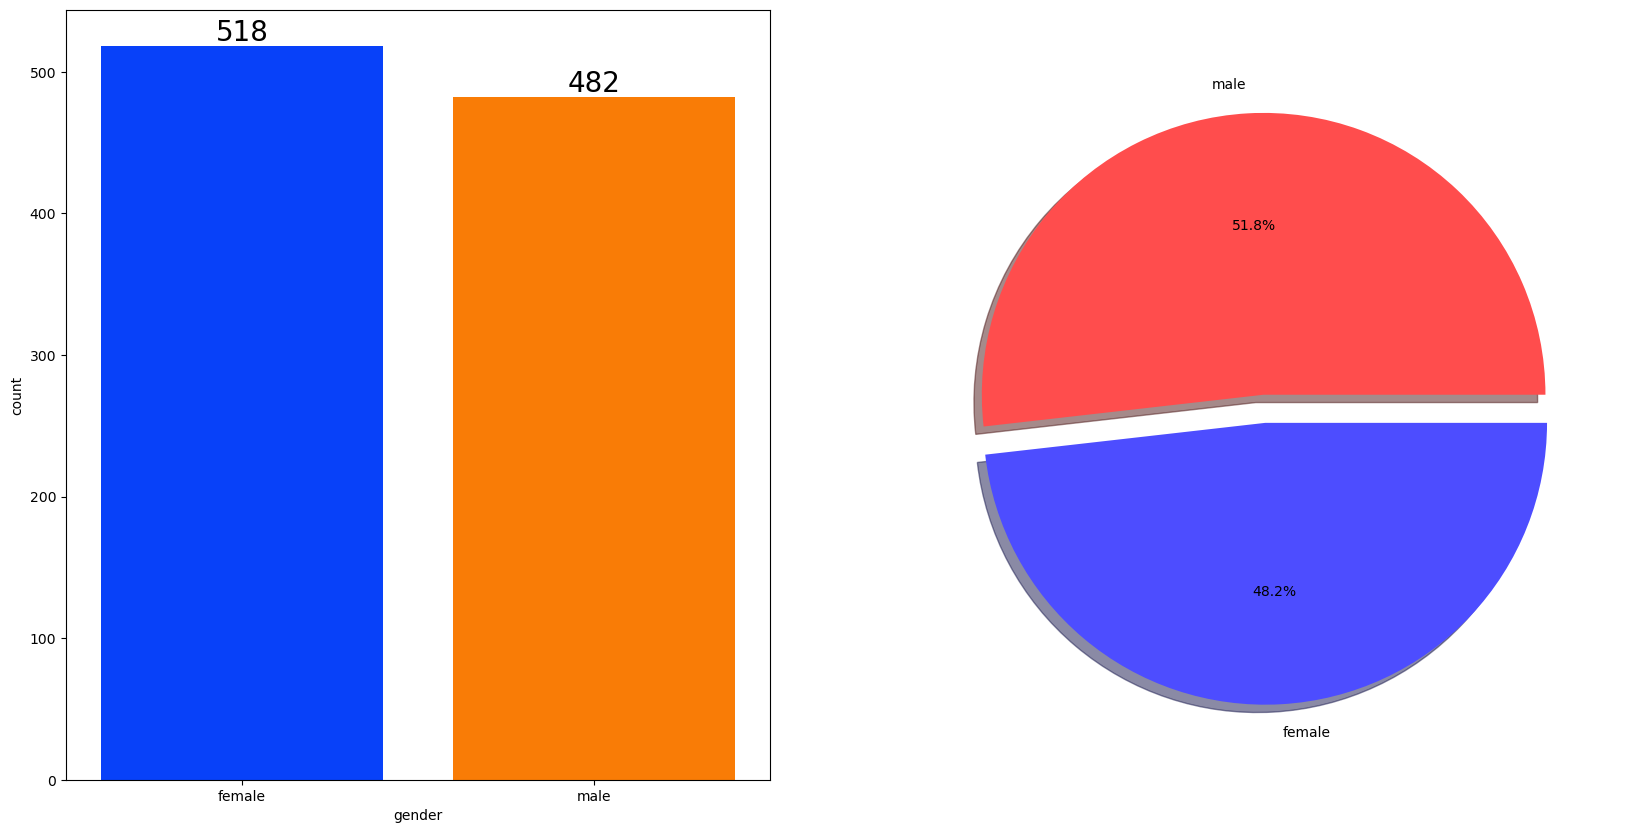

In [23]:
#univariate analysis 
f, ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data = df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels =['male','female'],explode=[0,0.1],autopct="%1.1f%%",shadow=True,colors=['#ff4d4d','#4d4dff'])
plt.show()

In [27]:
gender_group = df.groupby("gender").mean(numeric_only=True)


In [28]:
gender_group

,math score,reading score,writing score,total_score,avg_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


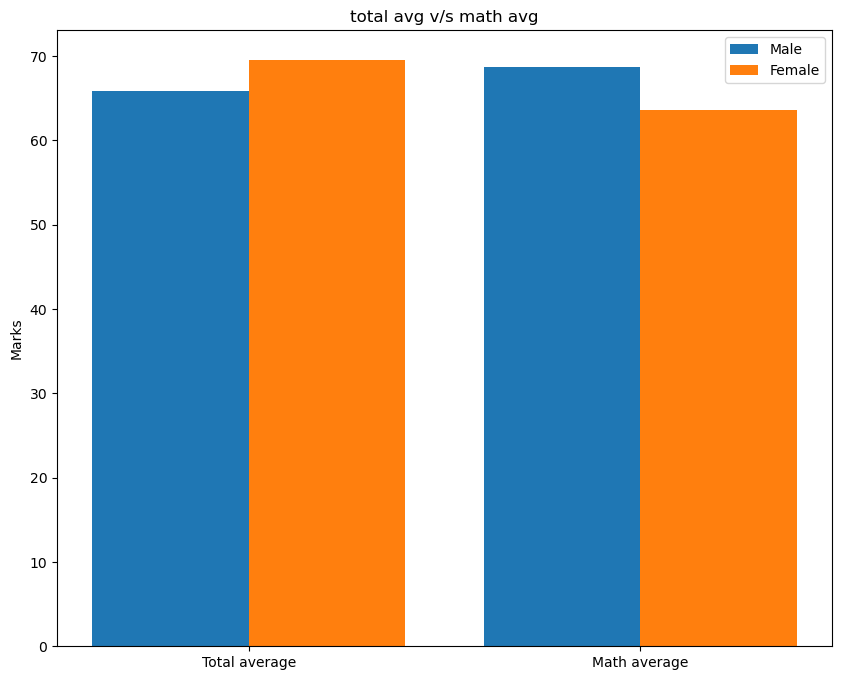

In [29]:
plt.figure(figsize=(10,8))
x = ['Total average','Math average']

female_scores = [gender_group['avg_score'][0],gender_group['math score'][0]]
male_scores = [gender_group['avg_score'][1],gender_group['math score'][1]]
x_axis = np.arange(len(x))
plt.bar(x_axis - 0.2,male_scores, 0.4, label = 'Male')
plt.bar(x_axis + 0.2,female_scores, 0.4, label = 'Female')
               
plt.xticks(x_axis,x)
plt.ylabel('Marks')
plt.title('total avg v/s math avg')
plt.legend()
plt.show()

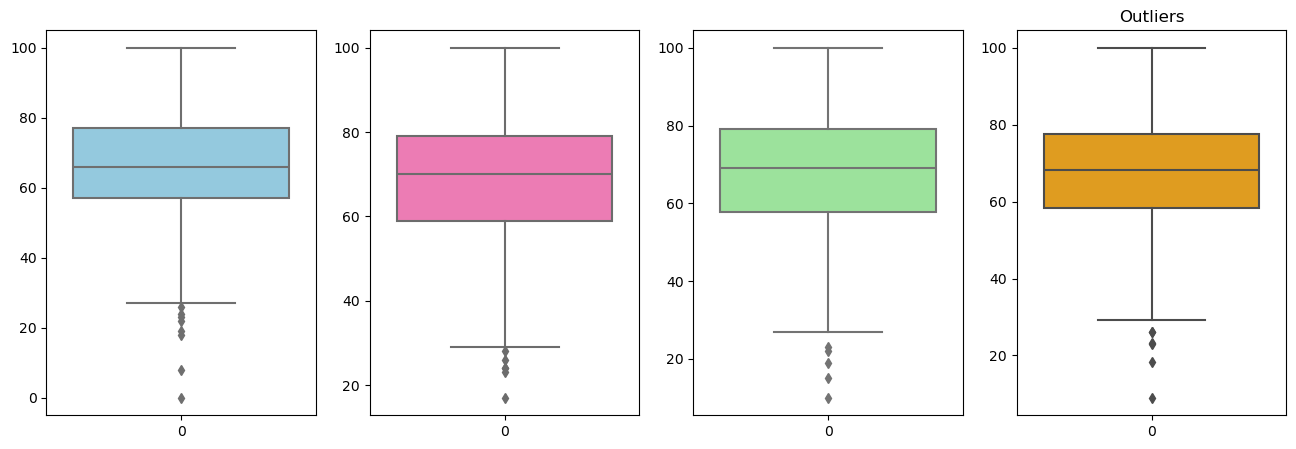

In [38]:
#checking outliers
import seaborn as sns
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color="skyblue")
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='lightgreen')
plt.subplot(144)
sns.boxplot(df['avg_score'],color='orange')
plt.title("Outliers")
plt.show()


In [31]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


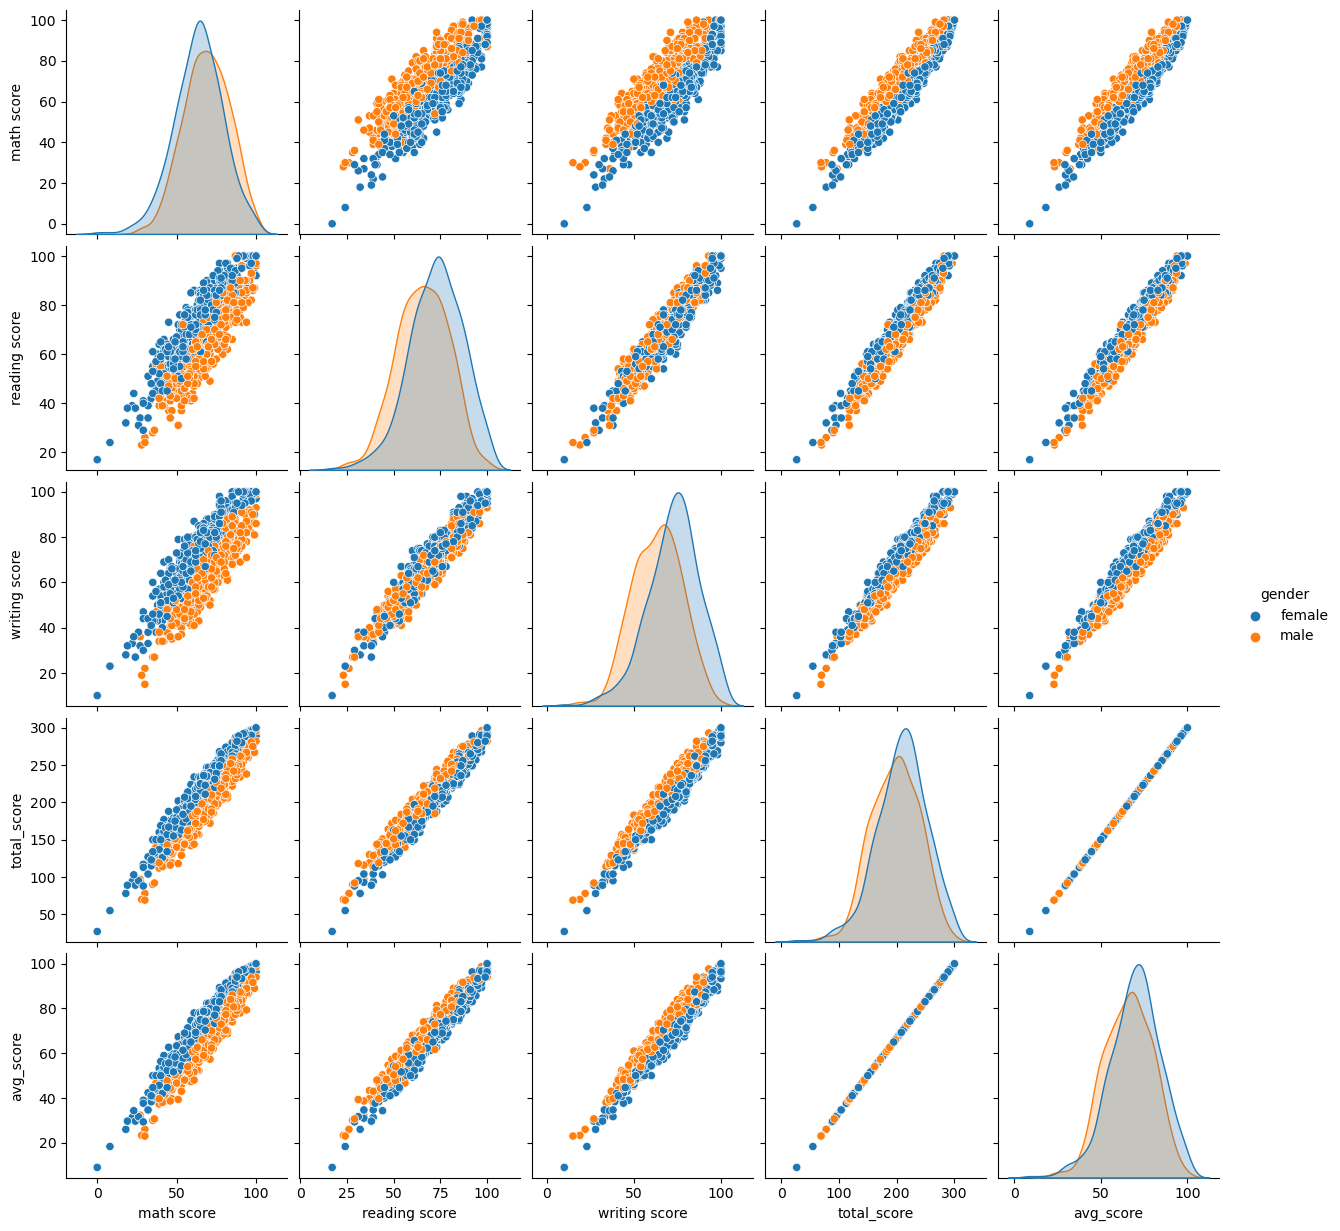

In [39]:
#multivariate analysis using gender
sns.pairplot(df,hue='gender')
plt.show()

In [ ]:
#####conclusions########
#student performance is related with lunch ,race,parental level education
#female lead in pass percentage and also are top scores
#students performance is not much related with test preparation course
#finsihing preparation course is beneficial